# L9 Least-Squares Problems and Best-Fit

## Example 4: price decay (simple linear regression)

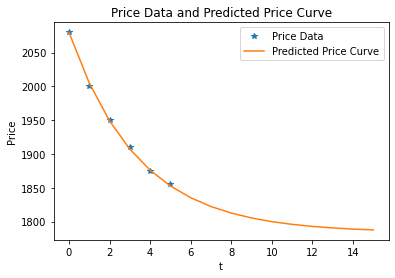

Residual vector r: [ 0.         -5.02380325  0.9662229   2.77793334 -0.99830682  2.31868184]
Norm of r: 6.345234544175826
Matrix A:
[[2.000e+03 1.000e+00]
 [1.950e+03 1.000e+00]
 [1.910e+03 1.000e+00]
 [1.875e+03 1.000e+00]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data
price = np.array([2080, 2000, 1950, 1910, 1875, 1855])
time = np.arange(0, 16)

# Compute d
d = []
for i in range(1, 5):
    d.append((price[i + 1] - price[i - 1]) / 2)
d = np.array(d)

# Matrix A
A = np.column_stack((price[1:5], np.ones(4)))

# Least squares method (the normal equation)
Y = A.T @ A
x = np.linalg.inv(Y) @ (A.T @ d)

# Extract parameters
c = -x[0]
pmin = x[1] / (-x[0])

# Predicted future prices
future_price = pmin + (2080 - pmin) * np.exp(-c * time)

# Plotting
plt.plot(time[:6], price, '*', label="Price Data")
plt.plot(time, future_price, label="Predicted Price Curve")
plt.title('Price Data and Predicted Price Curve')
plt.xlabel('t')
plt.ylabel('Price')
plt.legend()
plt.show()

# Predicted price at t = 8
predicted_price = future_price[8]

# Compute the norm of the Residual Vector
r = price[:6] - future_price[:6]
norm_r = np.linalg.norm(r)

# Output results
print("Residual vector r:", r)
print("Norm of r:", norm_r)
print("Matrix A:")
print(A)


## Example 5

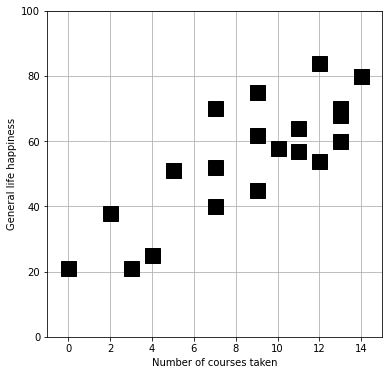

(20, 1)


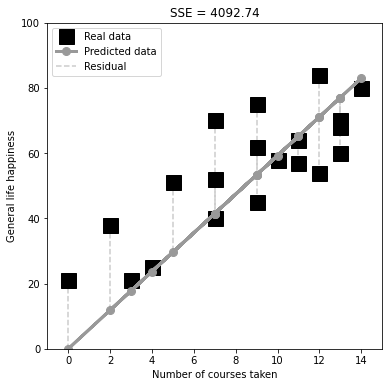

In [67]:
import numpy as np
import matplotlib.pyplot as plt
# null space
from scipy.linalg import null_space
import sympy as sym
#number of courses
numcourses = [13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7]

# life happiness
happiness  = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]

plt.figure(figsize=(6,6))

plt.plot(numcourses,happiness,'ks',markersize=15)
plt.xlabel('Number of courses taken')
plt.ylabel('General life happiness')
plt.xlim([-1,15])
plt.ylim([0,100])
plt.grid()
plt.xticks(range(0,15,2))
plt.savefig('least_square.png',dpi=300)
plt.show()

# Build a statistical model

# design matrix as a column vector
X = np.array(numcourses,ndmin=2).T
print(X.shape)

# fit the model using the left-inverse
X_leftinv = np.linalg.inv(X.T@X) @ X.T

# solve for the coefficients
beta = X_leftinv @ happiness
beta

# predicted data
pred_happiness = X@beta


plt.figure(figsize=(6,6))

# plot the data and predicted values
plt.plot(numcourses,happiness,'ks',markersize=15)
plt.plot(numcourses,pred_happiness,'o-',color=[.6,.6,.6],linewidth=3,markersize=8)

# plot the residuals (errors)
for n,y,yHat in zip(numcourses,happiness,pred_happiness):
  plt.plot([n,n],[y,yHat],'--',color=[.8,.8,.8],zorder=-10)

plt.xlabel('Number of courses taken')
plt.ylabel('General life happiness')
plt.xlim([-1,15])
plt.ylim([0,100])
plt.xticks(range(0,15,2))
plt.legend(['Real data','Predicted data','Residual'])
plt.title(f'SSE = {np.sum((pred_happiness-happiness)**2):.2f}')
plt.savefig('Figure_11_04.png',dpi=300)
plt.show()


# Simple linear regression

## (a) Linear Algebra and the Least Squares Method

$$X \vec{\beta}=\vec{y}, \quad \vec{\beta} = (X^T X)^{-1} X^T \vec{y}$$

   x   y
0  1   5
1  2  10
2  3  10
3  4  15
4  5  14
[[ 1  1]
 [ 1  2]
 [ 1  3]
 [ 1  4]
 [ 1  5]
 [ 1  6]
 [ 1  7]
 [ 1  8]
 [ 1  9]
 [ 1 10]]
m=[1.93939394],b=[4.73333333]


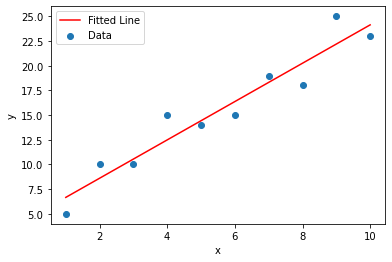

In [74]:
import pandas as pd
import numpy as np

# Import points
df = pd.read_csv('dogs.csv')
print(df.head())

# extract input variables x
x = df['x'].to_numpy()  # predictor variable 
# make x a column
x=x.reshape(-1,1)
# print(x)

# extract output variables y
y=df.values[:,-1]
# make y a column
y=y.reshape(-1,1)
# print(y)

# model matrix X
ones=ones = np.full((len(x),1), 1)
X = np.append(ones, x, axis=1)
print(X)

left = X.transpose() @ X  # compute product X^T X
right = X.transpose() @ y  # compute X^T y
beta = np.linalg.inv(left) @ right  # find solution beta = (X^T X)^(-1) X^T y
# m is the slope and b is the intercept 
m=beta[1]
b=beta[0]
print(f"m={m},b={b}")

# Plot data points and fitted line
plt.scatter(x, y, label='Data')
plt.plot(x, m * x + b, color='red', label='Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



## (b) Linear Algebra and QR decomposition

$$ X\vec{\beta}=\vec{y},\quad X=QR, \quad \vec{\beta}=R^{-1}Q^{T}\vec{y}$$

   x   y
0  1   5
1  2  10
2  3  10
3  4  15
4  5  14
[[ 1  1]
 [ 1  2]
 [ 1  3]
 [ 1  4]
 [ 1  5]
 [ 1  6]
 [ 1  7]
 [ 1  8]
 [ 1  9]
 [ 1 10]]
m=[1.93939394],b=[4.73333333]


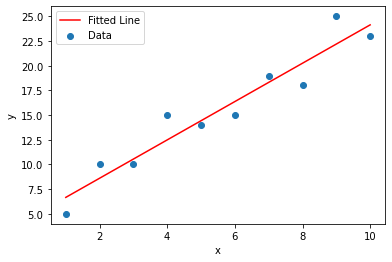

In [73]:
import pandas as pd
import numpy as np
from numpy.linalg import qr,inv

# Import points
df = pd.read_csv('dogs.csv')
print(df.head())

# extract input variables x
x = df['x'].to_numpy()  # predictor variable 
# make x a column
x=x.reshape(-1,1)
# print(x)

# extract output variables y
y=df.values[:,-1]
# make y a column
y=y.reshape(-1,1)
# print(y)

# model matrix X
ones=ones = np.full((len(x),1), 1)
X = np.append(ones, x, axis=1)
print(X)

# calculate coefficients using QR decomposition
Q,R=qr(X)
beta=inv(R)@Q.T@y
# m is the slope and b is the intercept 
m=beta[1]
b=beta[0]
print(f"m={m},b={b}")

# Plot data points and fitted line
plt.scatter(x, y, label='Data')
plt.plot(x, m * x + b, color='red', label='Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


## Simple linear regression with scikit-learn

   x   y
0  1   5
1  2  10
2  3  10
3  4  15
4  5  14
m=[1.93939394]
b=[4.73333333]
 
Point 1: x=1, y=5, predicted=[6.67272727], residual=[-1.67272727]
 
Point 2: x=2, y=10, predicted=[8.61212121], residual=[1.38787879]
 
Point 3: x=3, y=10, predicted=[10.55151515], residual=[-0.55151515]
 
Point 4: x=4, y=15, predicted=[12.49090909], residual=[2.50909091]
 
Point 5: x=5, y=14, predicted=[14.43030303], residual=[-0.43030303]
 
Point 6: x=6, y=15, predicted=[16.36969697], residual=[-1.36969697]
 
Point 7: x=7, y=19, predicted=[18.30909091], residual=[0.69090909]
 
Point 8: x=8, y=18, predicted=[20.24848485], residual=[-2.24848485]
 
Point 9: x=9, y=25, predicted=[22.18787879], residual=[2.81212121]
 
Point 10: x=10, y=23, predicted=[24.12727273], residual=[-1.12727273]
 
Sum of squared residuals: [28.0969697]
 
standard deviation SSE=1.8740654236502023


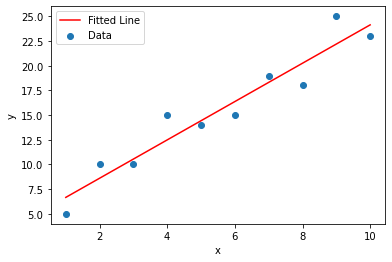

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import points
df = pd.read_csv('dogs.csv')
print(df.head())

# Extract input (x) and output (y) variables
x = df.values[:, :-1]
y = df.values[:, -1]

# Fit a linear model
fit = LinearRegression().fit(x, y)
m = fit.coef_.flatten()
b = fit.intercept_.flatten()
print(f"m={m}")
print(f"b={b}"),print(' ')

# Compute residuals and sum of squared residuals
ssr = 0
for i, (xdata, ydata) in enumerate(zip(x.flatten(), y)):
    y_model = m * xdata + b
    residual = ydata - y_model
    ssr += residual**2
    print(f"Point {i+1}: x={xdata}, y={ydata}, predicted={y_model}, residual={residual}"), print(' ')

print(f"Sum of squared residuals: {ssr}"), print(' ')

# standard error of estimate (standard deviation)
n=len(x)
SSE=sqrt(ssr/(n-2))
print(f"standard deviation SSE={SSE}")

# Plot data points and fitted line
plt.scatter(x, y, label='Data')
plt.plot(x, m * x + b, color='red', label='Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


## Train/ Test split
1/3 of the data is set aside for testing and the other 2/3 is used for training.
The training data set is used to fit the linear regression, while the testing dataset is used to measure the linear regressin performance on data it has not seen before. This technique is generally used for supervised machine learning.

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Import points
df = pd.read_csv('dogs.csv')
print(df.head())

# Extract input (x) and output (y) variables
x = df.values[:, :-1]
y = df.values[:, -1]

# Separate training and testing data. We leave 1/3 of the data for testing
# train_test_split() will take data set (x and y columns), shuffle it,
# and then return training and testing datasets beased on our testing dataset size. 
# 1/3 is the most common but can be , 1/5, or 1/10. 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3)

# Fit a linear model
model = LinearRegression()
model.fit(x_train, y_train)
m = model.coef_.flatten()
b = model.intercept_.flatten()
print(f"m={m}")
print(f"b={b}"),print(' ')

# score() function is used on testing datasets x_test, y_test.
# It evaluates R squared giving us a sence of how the regression performs on data it has not seen before.
# The bigger R squared, the better.
result=model.score(x_test,y_test)
print(f"r^2={result}")


   x   y
0  1   5
1  2  10
2  3  10
3  4  15
4  5  14
m=[1.70038911]
b=[6.38132296]
 
r^2=0.8697301477634052


## Using three-fold-cross-validation for linear regession
We can alternate the testing data set across each 1/3 fold. This is known as cross-validation. 

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

# Import points
df = pd.read_csv('dogs.csv')
print(df.head())

# Extract input (x) and output (y) variables
x = df.values[:, :-1]
y = df.values[:, -1]

kfold=KFold(n_splits=3, random_state=7, shuffle=True)
model=LinearRegression()
# results has three R squared for each of three iterations
results=cross_val_score(model,x,y,cv=kfold)
print(results)
# MSE is the mean sum of squares
mean=results.mean()
stdev=results.std()
print(f"MSE mean={mean}, stdev={stdev}")


   x   y
0  1   5
1  2  10
2  3  10
3  4  15
4  5  14
[0.82514286 0.64591573 0.2975653 ]
MSE mean=0.5895412971570677, stdev=0.21904044723571428


## Stochastic Gradient Descent and Linear Regression

In [114]:
import pandas as pd
import numpy as np

# Import points
data = pd.read_csv('dogs.csv', header=0)

x=data.iloc[:,0].values
y=data.iloc[:,1].values

# build the model
m=0.0
b=0.0

sample_size=1 # sample size

# the learning rate
L=0.001

# the number of iteractions
iteractions =1_100_100

# Performing stochastic gradient descent
for i in range(iteractions):
    idx=np.random.choice(n,sample_size, replace=False)
    x_sample=x[idx]
    y_sample=y[idx]
    
# the current predicted value of y
y_pred=m*x_sample+b

# d/dm derivative of loss function
D_m=(-2/sample_size)*sum(x_sample*(y_sample-y_pred))

# d/db derivative of loss function
D_b=(-2/sample_size)*sum(y_sample-y_pred)


m=m-L*D_m # update m
b=b-L*D_b # update b

# print progress
if i % 10000==0:
    print(i,m,b)
print("y={0}x+{1}".format(m,b))


y=0.46x+0.046


## Statistics: Correlation coefficient (Pearson), $R^2$, T-distribution, p-value

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.linear_model import LinearRegression
from scipy.stats import t
from math import sqrt

# Import points
df = pd.read_csv('dogs.csv')
print(df.head())

# Extract input (x) and output (y) variables
x = df.values[:, :-1]
y = df.values[:, -1]


# Statistics

# compute correlation coefficient
correlations=df.corr(method='pearson')
r=correlations.iloc[0, 1]
print(f"r={r}"), print(' ')

# R-squared
R_squared=r**2
print(f"R_squared={R_squared}"), print(' ')


# Calculating the critical value from a T-distribution
# sample size
n=len(x)
lower_cv=t(n-1).ppf(0.025)
upper_cv=t(n-1).ppf(0.975)

# perform the test
test_value=r/sqrt((1-r**2)/(n-2))
print(f"test_value={test_value}"), print(' ')

if test_value < lower_cv or test_value > upper_cv:
    print("correlation proven, reject H0")
else:
    print("correlation not proven, failed to reject H0")
# calculate p-value
if test_value > 0:
    p_value=1.0-t(n-1).cdf(test_value)
else:
    p_value=t(n-1).cdf(test_value)
# two-tailed, so we multiply by 2
p_value=p_value*2
print(f"p_value={p_value}")
        

   x   y
0  1   5
1  2  10
2  3  10
3  4  15
4  5  14
r=0.9575860952087218
 
R_squared=0.9169711297370873
 
test_value=9.399575927136752
 
correlation proven, reject H0
p_value=5.976327099421752e-06


# Example on Multiple Linear Regression

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import points
df = pd.read_csv('data2.csv')
print(df.head())

# Extract input (x) and output (y) variables
x = df.values[:, :-1]
y = df.values[:, -1]

# Fit a linear model
fit = LinearRegression().fit(x, y)

print("coefficients={0}".format(fit.coef_))
print("intercept={0}".format(fit.intercept_))
print("z={0}+{1}x+{2}y".format(fit.intercept_,fit.coef_[0],fit.coef_[1]))

   x1  x2   y
0   0  22  88
1   1  13  62
2   1  15  67
3   1  14  62
4   2  18  77
coefficients=[2.00672647 3.00203798]
intercept=20.10943282003599
z=20.10943282003599+2.0067264725128062x+3.002037976646691y
